In [1]:
# Dataset with 14 indicators of Heart Health
# Process:
# 1. Get to know data - Find outliers, find correlations, etc.
# 2. Conduct a hypothesis. Determine which factors I think will most effect chance of heart disease.
# 3. Construct a logistic regression, only include significant variables.
# 4. Test other machine learning methods such as SVM, Random Forest, Etc.
# 5. Conclude results
# 6. Make a prediction with my own personal data

# Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# 1. Input data
heart = pd.read_csv('heart.csv')

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
72    29    1   1       130   204    0        0      202      0      0.0   
58    34    1   3       118   182    0        0      174      0      0.0   
125   34    0   1       118   210    0        1      192      0      0.7   
239   35    1   0       126   282    0        0      156      1      0.0   
65    35    0   0       138   183    0        1      182      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
60    71    0   2       110   265    1        0      130      0      0.0   
151   71    0   0       112   149    0        1      125      0      1.6   
129   74    0   1       120   269    0        0      121      1      0.2   
144   76    0   2       140   197    0        2      116      0      1.1   
238   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  
72       2   0     2       1  
58       2   0     2     

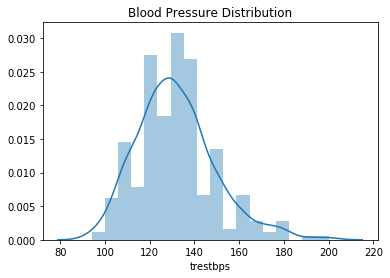

In [15]:
# Check for outliers. Overall the data seems to be normally distrbuted in terms of patient age and blood pressure.
print(heart.sort_values(by='age'))
print(sns.distplot(heart['trestbps']).set_title('Blood Pressure Distribution'))


Text(0.5, 1.0, 'Age Distribution')


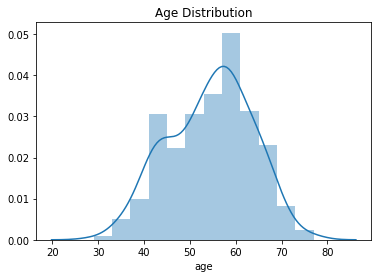

In [16]:
print(sns.distplot(heart['age']).set_title('Age Distribution'))

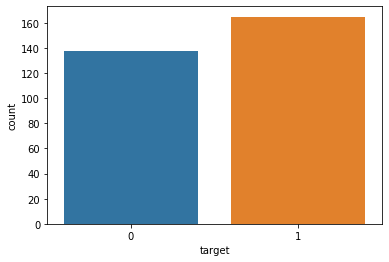

In [17]:
# group 0 has heart disease
sns.countplot(x='target',data=heart)

In [19]:
# General comparison between groups
heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [21]:
# look at difference in target
heart.groupby('exang').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
exang,,,,,,,,,,,,,
0,53.754902,0.637255,1.250000,130.799020,243.848039,0.142157,0.553922,155.681373,0.806863,1.509804,0.647059,2.225490,0.696078
1,55.626263,0.777778,0.383838,133.323232,251.242424,0.161616,0.474747,137.212121,1.519192,1.171717,0.898990,2.494949,0.232323
